<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>

---

In this notebook, we illustrate NumPy features for building simple univariate linear regression models. Consult the [accompanying lecture slides](https://risk-engineering.org/linear-regression-analysis/) for background on linear regression analysis and some notes on when the technique is useful.

# Linear regression analysis of smoking data

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%config InlineBackend.figure_formats=['svg']

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The *British Doctors’ Study* followed the health of a large number of physicians in the UK over the period 1951–2001. It provided conclusive evidence of linkage between smoking and lung cancer, myocardial infarction, respiratory disease and other smoking-related illnesses. 

The study provided data on annual mortality for a variety of diseases at four levels of cigarette smoking:

- never smoked
- 1-14 per day
- 15-24 per day
- more than 25 per day

The data is as follows:

In [2]:
df = pandas.DataFrame({'cigarettes' : [0,10,20,30], 'CVD' : [572,802,892,1025], 'lung' : [14, 105, 208, 355]})
df.head()

,cigarettes,CVD,lung
0,0,572,14
1,10,802,105
2,20,892,208
3,30,1025,355


Note: CVD is an acronym for cardio-vascular disease. 

Let’s plot the data to see whether a linear model is a plausible representation for the health impact of smoking.

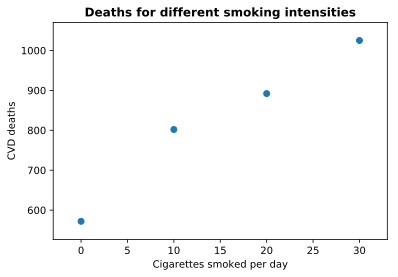

In [3]:
plt.plot(df.cigarettes, df.CVD, "o")
plt.margins(0.1)
plt.title("Deaths for different smoking intensities", weight='bold')
plt.xlabel("Cigarettes smoked per day")
plt.ylabel("CVD deaths");

It is quite tempting from this graph to conclude that cardiovascular disease deaths increase linearly with cigarette consumption. We can fit a linear model to this data, using the `statsmodels` library (an alternative possibility is to use the `scikit-learn` library, which has more functionality related to machine learning). We will use the formula interface to ordinary least squares regression, available in `statsmodels.formula.api`. 

For simple linear regression (with a single predictor variable), formulas are written `outcome ~ observation`. 

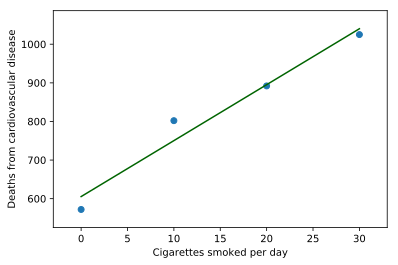

In [4]:
import statsmodels.formula.api as smf

lm = smf.ols("CVD ~ cigarettes", data=df).fit()
xmin = df.cigarettes.min()
xmax = df.cigarettes.max()
X = numpy.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta0)
# params[1] is the slope (beta1)
Y = lm.params[0] + lm.params[1] * X
plt.plot(df.cigarettes, df.CVD, "o")
plt.plot(X, Y, color="darkgreen")
plt.xlabel("Cigarettes smoked per day")
plt.ylabel("Deaths from cardiovascular disease")
plt.margins(0.1)

In the regression model, $\beta_0$ is the **intercept** of the regression line and $\beta_1$ is its **slope**. 

We can make a similar plot for lung cancer deaths. 

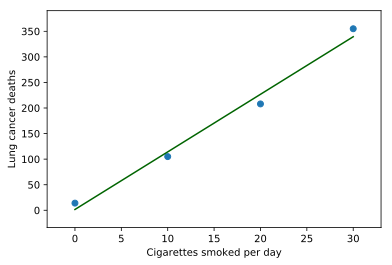

In [5]:
lm = smf.ols("lung ~ cigarettes", data=df).fit()
xmin = df.cigarettes.min()
xmax = df.cigarettes.max()
X = numpy.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta0)
# params[1] is the slope (beta1)
Y = lm.params[0] + lm.params[1] * X
plt.plot(df.cigarettes, df.lung, "o")
plt.plot(X, Y, color="darkgreen")
plt.xlabel("Cigarettes smoked per day")
plt.ylabel("Lung cancer deaths")
plt.margins(0.1)

We can use the linear model for **prediction**, to estimate the likelihood of death from lung cancer or from cardiovascular disease for a level of smoking for which we have no direct data. For example, the expected lung cancer mortality risk for a group of people who smoke 15 cigarettes per day is

In [6]:
# use the fitted model for prediction
lm.predict({'cigarettes': [15]}) / 100000.0

0    0.001705
dtype: float64

Note that we have divided by 100000, because the data given is the number of deaths per 100000 people. 

We can examine some information on the “goodness of fit”, or the quality of the linear model:

In [7]:
lm.summary()

/usr/lib/python3/dist-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lung   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 30 Oct 2018   Prob (F-statistic):            0.00652
Time:                        22:21:21   Log-Likelihood:                -16.359
No. Observations:                   4   AIC:                             36.72
Df Residuals:                       2   BIC:                             35.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6000     17.097      0.094      0.934     -71.964      75.164
cigarettes    11.2600      0.914     12.321      0.007       7.328      15.192
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.086
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.534
Skew:                          -0.143   Prob(JB):                        0.766
Kurtosis:                       1.233   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In particular, the $R^2$ value of 0.987 is very high, indicating a good level of fit to our dataset. However, given the small size of our dataset (only 4 observations), the 95% confidence interval for our model parameters $\beta_0$ and $\beta_1$ is quite large. In fact, our 4 data points are based on a large number of observations, so our confidence in this data is high, but unfortunately we don't have access to the original data (where each observation corresponds to one person).

The Seaborn package provides convenient functions for making plots of linear regression models. In particular, the `regplot` function generates a regression plot that includes 95% confidence intervals for the model parameters.

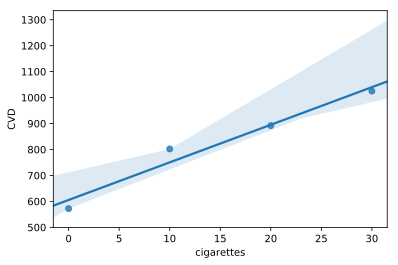

In [8]:
sns.regplot(df.cigarettes, df.CVD);